# Módulo 2 - Elementos de probabilidad y estadística

Facultad de Ciencias Exactas y Naturales y Agrimensura (FaCENA) - UNNE

Diplomatura Universitaria en Ciencia de Datos


Profesores:
* Lic. Álvarez Fernando fernando.alvarez@comunidad.unne.edu.ar
* Lic. Cabás Celine celine.cabas@comunidad.unne.edu.ar
* Dr. Hisgen Matías matias.hisgen@comunidad.unne.edu.ar

\

---



Cargamos las librerías que vamos a utilizar:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns           # Para gráficos
import scipy.stats as stats     # Para calcular funciones de densidad
import scipy.special as sps # Para función gamma

# Conceptos introductorios

## Distribución de frecuencias

Una distribución de frecuencias es un agrupamiento de datos en categorías que muestran el número de observaciones en cada categoría mutuamente excluyente. Si estamos trabajando con una variable discreta, vemos la frecuencia absoluta o relativa de cada valor que asume la variable. Si trabajamos con una variable continua, podemos asociar las frecuencias a intervalos continuos de valores (Intervalos de clase).

Vemos el caso de una variable aleatoria discreta. Guardamos 100 observaciones de esta variable:

In [ ]:
X = pd.Series([2, 2, 4, 4, 6, 3, 3, 5, 7, 1, 5, 5, 3, 3, 2, 2, 4, 3, 2, 4, 7, 5, 4, 3, 5, 1, 5, 4, 4, 3, 4, 7, 5, 3, 4, 2, 3, 6, 5, 7, 3, 3, 5, 4,
              2, 1, 5, 4, 1, 5, 3, 7, 3, 2, 5, 4, 3, 8, 1, 6, 1, 5, 5, 2, 3, 2, 5, 5, 2, 5, 4, 2, 5, 2, 4, 5, 3, 3, 3, 4, 5, 3, 5, 4, 3, 3, 5, 5,
              6, 6, 6, 3, 4, 4, 7, 5, 4, 4, 6, 5])

Tabla de frecuencias absolutas:

In [ ]:
X.value_counts()

5    25
3    22
4    20
2    13
6     7
7     6
1     6
8     1
Name: count, dtype: int64

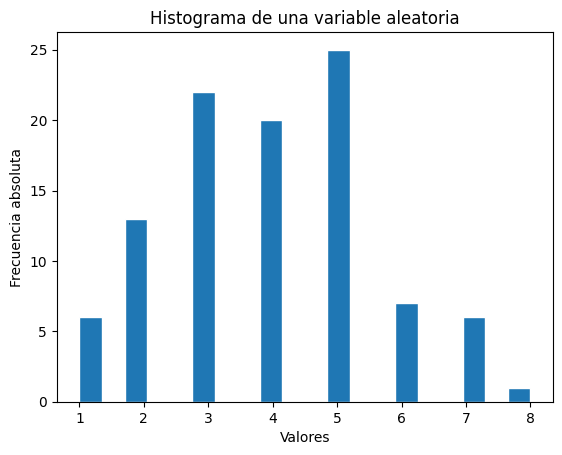

In [ ]:
plt.hist(X, bins=20, edgecolor = "white")
plt.ylabel('Frecuencia absoluta')
plt.xlabel('Valores')
plt.title('Histograma de una variable aleatoria')
plt.show()

Tabla de frecuencias relativas:

In [ ]:
X.value_counts(normalize=True)

5    0.25
3    0.22
4    0.20
2    0.13
6    0.07
7    0.06
1    0.06
8    0.01
Name: proportion, dtype: float64

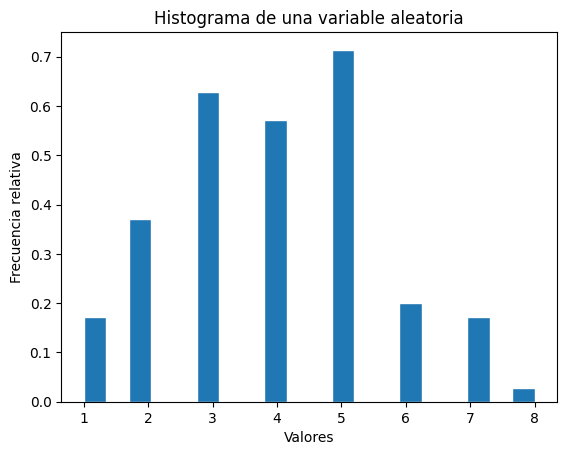

In [ ]:
plt.hist(X, bins=20, edgecolor = "white", density=True)
plt.ylabel('Frecuencia relativa')
plt.xlabel('Valores')
plt.title('Histograma de una variable aleatoria')
plt.show()

Tabla de frecuencias absolutas y relativas

In [ ]:
tabla = pd.DataFrame()
tabla['X'] = X.value_counts().index
tabla['Frec_absolutas'] = X.value_counts().values
tabla['Frec_relativas'] = X.value_counts(normalize=True).values
tabla = tabla.sort_values('X')
tabla['Acum_absolutas'] = tabla['Frec_absolutas'].cumsum()
tabla['Acum_relativas'] = tabla['Frec_relativas'].cumsum()
tabla = tabla[['X','Frec_absolutas', 'Acum_absolutas', 'Frec_relativas', 'Acum_relativas']]
tabla

,X,Frec_absolutas,Acum_absolutas,Frec_relativas,Acum_relativas
6,1,6,6,0.06,0.06
3,2,13,19,0.13,0.19
1,3,22,41,0.22,0.41
2,4,20,61,0.20,0.61
0,5,25,86,0.25,0.86
4,6,7,93,0.07,0.93
5,7,6,99,0.06,0.99
7,8,1,100,0.01,1.00


## Medidas de tendencia central

**Parámetro: Esperanza o media de la población**.

Si $X$ es una variable aleatoria discreta con función de probabilidad $p$, entonces su valor esperado o esperanza se define como:

$$E(X)=\sum_{i\epsilon I}x_i*p(x)=\mu$$

**Estadístico: Media muestral**

$$\bar{X}=\sum_{i\epsilon I}x_i*p(x)=\frac{1}{n}\sum_{i=1}^nx_i$$

donde $I$ es la imagen de X. Es decir, todos los valores posibles que asume $X$ tanto en la población como en la muestra observada.

In [ ]:
media_muestral = sum(tabla['X']*tabla['Frec_relativas']); media_muestral

3.95

In [ ]:
n=100
media_muestral = sum(X)/len(X); media_muestral

3.95

In [ ]:
X.mean()

3.95

## Medidas de dispersión

**Parámetro: Varianza poblacional**. Es una medida que resume la variabilidad total de un atributo alrededor de su media. Se define como sigue:

$$\sigma^2=\frac{1}{N} \sum_{i=1}^N{(X_i-\mu)^2}$$

**Estadístico: Varianza muestral**. Estima la varianza de la población mediante las realizaciones muestrales. Se define como sigue:

$$S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\bar{X})^2$$

In [ ]:
var_x = sum((X-media_muestral)**2)/(n-1); var_x

2.532828282828282

In [ ]:
X.var()

2.532828282828283

## Interpretación frecuentista de la probabilidad

Considerando un evento A con probabilidad de ocurrencia P(A)=0.5, la interpretación frecuentista de la probabilidad se basa en computarla basada en la frecuencia relativa de un evento para un gran número de repeticiones.

$$P(A)=\lim_{N \to \infty} \frac{N_A}{N}= \frac{n_A}{n}$$


Simulamos la realización de un experimento, donde X=1 cuando ocurre el evento A y X=0 cuando no ocurre. Repetimos esto 500 veces, con tamaños muestrales que van desde 1 hasta 500. En cada caso guardamos la frecuencia relativa del evento A.

In [ ]:
prop = []
for i in range(1,500):
  x = np.random.binomial(n=1, p=0.5, size=i)
  prop_i = x.mean()
  prop.append(prop_i)

Vemos gráficamente como la frecuencia relativa converge a la probabilidad cuando aumentamos el número de realizaciones (n)

[]

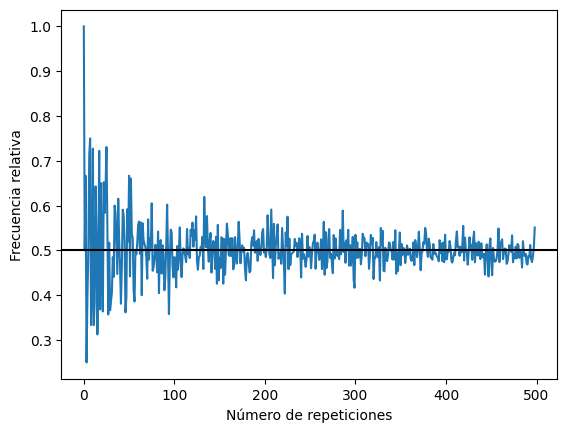

In [ ]:
plt.plot(prop)
plt.axhline(0.5, color="black")
plt.ylabel("Frecuencia relativa")
plt.xlabel("Número de repeticiones")
plt.plot()

# Distribuciones discretas

## Distribución Binomial

**Definición**

X es una variable aleatoria que cuenta el número de éxitos en n ensayos independientes, entonces X tiene distribución binomial con parámetros n y p. La notación es la siguiente $X \sim B(n,p)$. La función de probabilidad de esta variable aleatoria es:

$$p(k)=P[X=k]=\binom{n}{k}p^k (1-p)^{n-k}$$

donde $\binom{n}{k}$ es un número combinatorio $\binom{n}{k}=\frac{n!}{(n-k)!k!}$

Momentos de la distribución:
$E(X)=p$ y $V(X)=np(1-p)$

**Simulación**

Generamos una variable aleatoria binomial con parámetros $n=10$ y $p=0.4$.

El parámetro *size* hace referencia a la cantidad de veces que se repite el experimento. Es decir, al número de realizaciones.

In [ ]:
np.random.seed(123)
x = np.random.binomial(n=10, p=0.4, size=1000)
x[1:20]

array([3, 3, 4, 5, 4, 7, 5, 4, 4, 3, 5, 4, 2, 4, 5, 3, 3, 4, 4])

Vemos un histograma de la distribución de frecuencias de la variable:

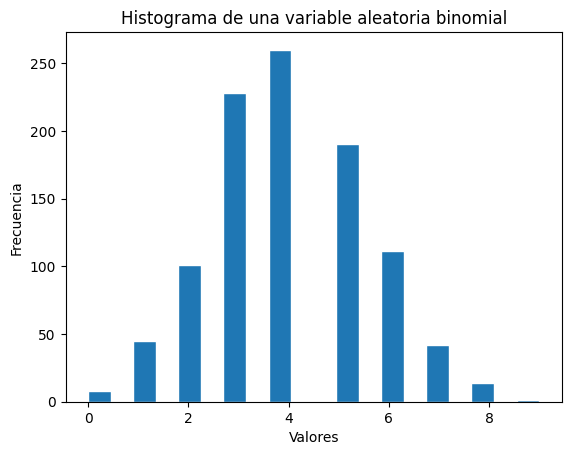

In [ ]:
plt.hist(x, 20, edgecolor = "white")
plt.ylabel('Frecuencia')
plt.xlabel('Valores')
plt.title('Histograma de una variable aleatoria binomial')
plt.show()

También podemos obtener la función de probabilidad acumulada.

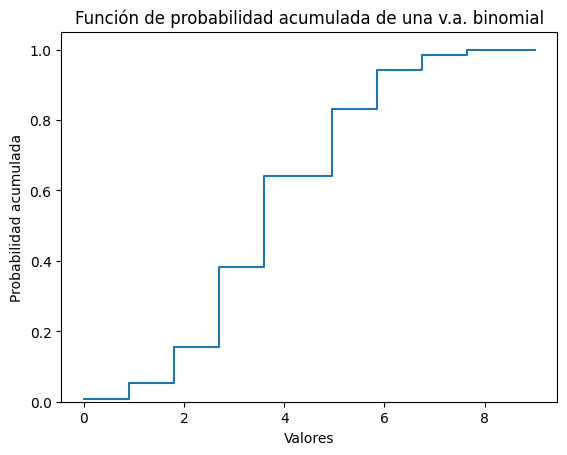

In [ ]:
sns.histplot(x, bins=20, cumulative=True, fill=False, stat = "probability", element="step")
plt.ylabel('Probabilidad acumulada')
plt.xlabel('Valores')
plt.title('Función de probabilidad acumulada de una v.a. binomial')
plt.show()

Calculamos el momento poblacional de la esperanza y su estimación con la media muestral:

In [ ]:
# Esperanza
n=10; p=0.4
E_x = n*p
# Media muestral
mean_x = x.mean()

print("Esperanza:", E_x)
print("Media muestral:", mean_x)

Esperanza: 4.0
Media muestral: 4.002


Calculamos el momento poblacional de la varianza y su estimación con la varianza muestral:

In [ ]:
# Varianza
V_x = n*p*(1-p)
# Varianza muestral
var_x = x.var()

print("Varianza:", V_x)
print("Media muestral:", var_x)

Varianza: 2.4
Media muestral: 2.425996


## Distribución Multinomial

**Definición**

X es un vector aleatorio que cuenta el número de éxitos en $n$ ensayos independientes que pueden tener como resultado alguna de las $J$ categorías. El vector aleatorio $(N_1,...,N_j)$ contiene los conteos de éxitos en cada categoría, donde $N_j$ puede hallarse por $N_j=M-(N_1+...+N_{J-1})$. El vector $p=(p_1,...,p_{j-1})$ contiene las probabilidades de que el resultado sea la categoría $1, 2, ..., j-1$. Entonces, la variable $X=(N_1,...,N_{j-1})$ tendrá distribución multinomial con parámetros $n$ y $p$ si su función de probabilidad es la siguiente:

$$P(N_1=n_1, N_2=n_2, ..., N_{J-1}=n_{J-1})=\frac{n!}{n_1!n_2!...n_J!}p_1^{n_1} p_2^{n_2}...p_J^{n_J}$$

donde: $n_J=n-(n_1+n_2+...+n_{J-1})$ y $p_J=1-(p_1+p_2+...+p_{J-1})$

**Simulación**

Generamos una variable aleatoria multinomial con parametros n=10 y las probabilidades p (en este caso asumimos tres clases) 0.1, 0.3 y 0.6.

In [ ]:
np.random.seed(123)
x = np.random.multinomial(n=10, pvals=[0.1, 0.3, 0.6], size=1000)
x[1:20]

array([[0, 3, 7],
       [1, 3, 6],
       [3, 3, 4],
       [1, 3, 6],
       [0, 4, 6],
       [1, 1, 8],
       [1, 4, 5],
       [0, 2, 8],
       [1, 3, 6],
       [1, 4, 5],
       [1, 3, 6],
       [1, 2, 7],
       [1, 2, 7],
       [0, 4, 6],
       [0, 3, 7],
       [1, 3, 6],
       [1, 2, 7],
       [1, 5, 4],
       [3, 2, 5]])

Calculamos los momentos poblacionales y sus estimaciones. Para el caso de la multinomial tenemos que obtener los momentos y los estimadores para cada uno de las clases, en nuestro caso de tres clases.

In [ ]:
n = 10; p1 = 0.1; p2 = 0.3; p3 = 0.6

# Esperanzas
E_x1 = n*p1
E_x2 = n*p2
E_x3 = n*p3

# Medias muestrales
mean_x1 = x[:,0].mean()
mean_x2 = x[:,1].mean()
mean_x3 = x[:,2].mean()

print("Esperanza clase 1:", E_x1)
print("Media muestral clase 1:", mean_x1)
print("Esperanza clase 2:", E_x2)
print("Media muestral clase 2:", mean_x2)
print("Esperanza clase 3:", E_x3)
print("Media muestral clase 3:", mean_x3)

Esperanza clase 1: 1.0
Media muestral clase 1: 0.967
Esperanza clase 2: 3.0
Media muestral clase 2: 3.073
Esperanza clase 3: 6.0
Media muestral clase 3: 5.96


Hacemos lo propio con la varianza.

In [ ]:
V_x1 = n*p1*(1-p1)
V_x2 = n*p2*(1-p2)
V_x3 = n*p3*(1-p3)

var_x1 = x[:,0].var()
var_x2 = x[:,1].var()
var_x3 = x[:,2].var()

print("Varianza clase 1:", V_x1)
print("Varianza muestral clase 1:", var_x1)
print("Varianza clase 2:", V_x2)
print("Varianza muestral clase 2:", var_x2)
print("Varianza clase 3:", V_x3)
print("Varianza muestral clase 3:", var_x3)

Varianza clase 1: 0.9
Varianza muestral clase 1: 0.9099109999999999
Varianza clase 2: 2.0999999999999996
Varianza muestral clase 2: 2.317671
Varianza clase 3: 2.4000000000000004
Varianza muestral clase 3: 2.4924000000000004


## Distribución Poisson

**Definición**

Una variable aleatoria $X$ tiene distribución de Poisson con parámetro $\lambda$ ($\lambda>0$) si su función de probabilidad está dada por:

$$p(k)=e^{-\lambda} \frac{\lambda^k}{k!}$$

Momentos de la distribución: $E(X)=V(X)=\lambda$

**Simulación**

In [ ]:
np.random.seed(123)
x = np.random.poisson(lam=5, size=10000)
x[1:20]

array([5, 4, 8, 4, 8, 7, 5, 9, 4, 3, 4, 7, 8, 5, 6, 4, 3, 7, 8])

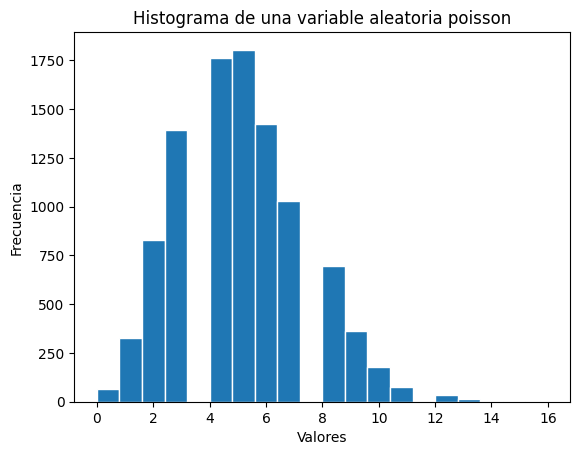

In [ ]:
plt.hist(x, 20, edgecolor = "white")
plt.ylabel('Frecuencia')
plt.xlabel('Valores')
plt.title('Histograma de una variable aleatoria poisson')
plt.show()

Calculamos la esperanza y varianza de la población como sus estimaciones muestrales.

In [ ]:
E_x = 5
mean_x = x.mean()

print("Esperanza:", E_x)
print("Media muestral:", mean_x)

Esperanza: 5
Media muestral: 5.0109


In [ ]:
V_x = 5
var_x = x.var()

print("Varianza:", V_x)
print("Varianza muestral:", var_x)

Varianza: 5
Varianza muestral: 4.9813811900000005


# Distribuciones continuas

## Distribución Normal o Gaussiana

**Definición**

Una variable aleatoria continua $X$ tendrá distribución normal con parámetros $\mu$ y $\sigma^2$ si su función de densidad es la siguiente:

$$f(x/\mu, \sigma2)=\frac{1}{\sqrt{2\pi\sigma2}} e^{-(x-\mu)^2/(2\sigma^2)}$$

Notación $X \sim N(\mu, \sigma^2)$

Momentos de la distribución: $E(X)=\mu$ y $V(X)=\sigma^2$

**Simulación**

Generamos 200 observaciones de una variable aleatoria normal con parámetros $\mu=10$ y $\sigma^2=4$

In [ ]:
np.random.seed(123)
x = np.random.normal(loc=10, scale=2, size=200)
x[1:20]

array([11.99469089, 10.565957  ,  6.98741057,  8.8427995 , 13.30287307,
        5.14664151,  9.14217474, 12.53187252,  8.2665192 ,  8.6422277 ,
        9.81058206, 12.98277925,  8.72219601,  9.11203608,  9.13129745,
       14.41186017, 14.37357218, 12.0081078 , 10.7723728 ])

Calculamos la densidad definida anteriormente para cada una de las observaciones generadas:

In [ ]:
x = np.sort(x)
x_fdp = stats.norm.pdf(x, loc=x.mean(), scale=x.std())

Vemos histograma y función de densidad de la variable $x$ normal:

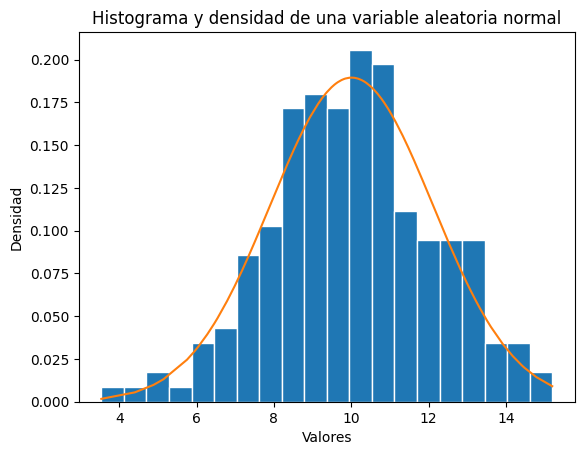

In [ ]:
plt.hist(x, bins=20, edgecolor = "white", density=True)
plt.plot(x, x_fdp)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal')
plt.show()

In [ ]:
mu = 10
sigma=2
print("Esperanza:", mu)
print("Media muestral:", x.mean())

Esperanza: 10
Media muestral: 10.007573511580215


In [ ]:
print("Varianza:", sigma**2)
print("Varianza muestral:", x.var())

Varianza: 4
Varianza muestral: 4.430036769609175


**Cambios en parámetros**

Vemos cómo influye en las distribuciones el cambio en el valor $\mu$, dejando fijo $\sigma$. Probamos tomando tres casos con $\mu$ igual a 7, 10 y 13.

In [ ]:
np.random.seed(123)
# Generación de variables aleatorias
X = []
mu = [7, 10, 13]
for i in mu:
  x = np.random.normal(loc=i, scale=1, size=500)
  x = np.sort(x) # ordenamos de menor a mayor
  X.append(x)

# Funciones de densidad
f = []
for i in range(3):
  x_fdp = stats.norm.pdf(X[i], loc=mu[i], scale=1)
  f.append(x_fdp)

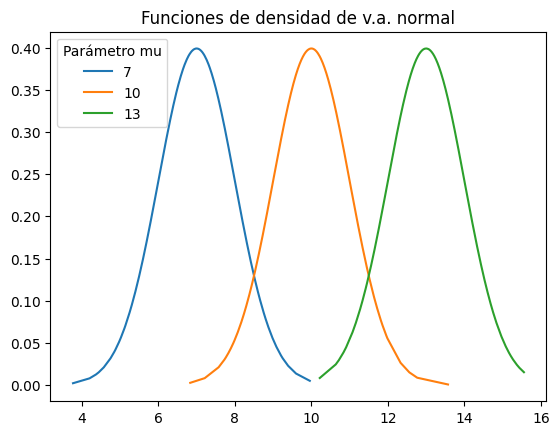

In [ ]:
for i in range(3):
  plt.plot(X[i],f[i], label=mu[i])
plt.title('Funciones de densidad de v.a. normal')
plt.legend(title='Parámetro mu')

Probamos dejar fijo el parámetro $\mu$ y modificar $\sigma$. Vemos nuevamente tres casos pero ahora con $\sigma$ en valores de 1, 3, y 5.

In [ ]:
np.random.seed(123)
# Generación de variables aleatorias
X = []
sigma = [1, 3, 5]
for i in sigma:
  x = np.random.normal(loc=10, scale=i, size=500)
  x = np.sort(x) # ordenamos de menor a mayor
  X.append(x)

# Funciones de densidad
f = []
for i in range(3):
  x_fdp = stats.norm.pdf(X[i], loc=10, scale=sigma[i])
  f.append(x_fdp)

Graficamos las funciones de densidad:

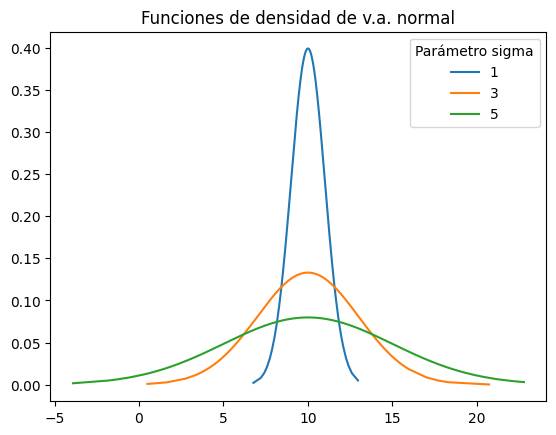

In [ ]:
for i in range(3):
  plt.plot(X[i],f[i], label=sigma[i])
plt.title('Funciones de densidad de v.a. normal')
plt.legend(title='Parámetro sigma')

**Distribución normal estándar**

Un caso particular de la distribución normal, muy utilizado, se da cuando los parámetros son $\mu=0$ y $\sigma=1$ y su notación es $Z \sim N(0,1)$. Podemos obtener esta distribución estandarizando una variable normal como $Z = \frac{X-\mu}{\sigma}$.

Estandarizamos la variable del caso anterior:

In [ ]:
# z = (x-x.mean())/x.std()
z = (x-10)/2
print("Media de x_std: ", z.mean())
print("Desvío estándar de x_std: ", z.std())

Media de x_std:  0.0037867557901067484
Desvío estándar de x_std:  1.0523826264255287


In [ ]:
z[1:20]

array([ 0.99734545,  0.2829785 , -1.50629471, -0.57860025,  1.65143654,
       -2.42667924, -0.42891263,  1.26593626, -0.8667404 , -0.67888615,
       -0.09470897,  1.49138963, -0.638902  , -0.44398196, -0.43435128,
        2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ])

Con la misma semilla de simulación, generamos una variable aleatoria normal estándar y comparamos resultados.

In [ ]:
np.random.seed(123)
z = np.random.normal(loc=0, scale=1, size=200)
z[1:20]

array([ 0.99734545,  0.2829785 , -1.50629471, -0.57860025,  1.65143654,
       -2.42667924, -0.42891263,  1.26593626, -0.8667404 , -0.67888615,
       -0.09470897,  1.49138963, -0.638902  , -0.44398196, -0.43435128,
        2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ])

Esta variable aleatoria quedará centrada en 0:

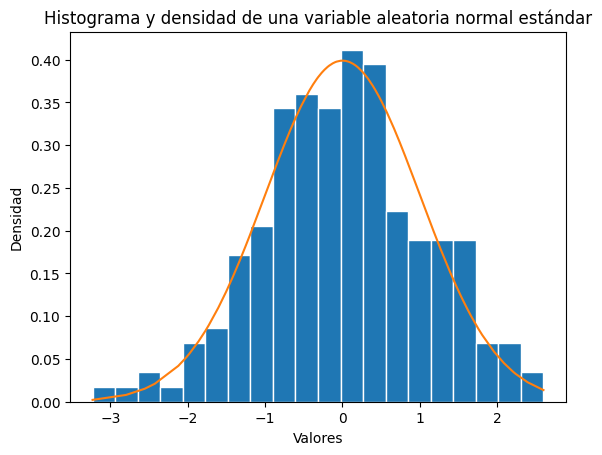

In [ ]:
z = np.sort(z)
z_fdp = stats.norm.pdf(z, loc=0, scale=1)
plt.hist(z, bins=20, edgecolor = "white", density=True)
plt.plot(z, z_fdp)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una variable aleatoria normal estándar')
plt.show()

## Distribución Exponencial

**Definición**

Esta distribución se utiliza frecuentemente para modelar el tiempo que transcurre hasta que ocurre determinado evento. Una variable aleatoria continua $X$ tendrá distribución exponencial de parámetro $\lambda>0$ si su función de densidad es la siguiente:

$$f(x)=
\begin{cases}
\lambda e^{-\lambda x} & si \ x>0 \\
0 & si \ x\leq0
\end{cases}$$

Momentos de la distribución: $E(X)=\frac{1}{\lambda}$ y $V(X)=\frac{1}{\lambda^2}$

**Simulación**

Generamos 200 realizaciones de una variable aleatoria exponencial con parámetro $\lambda=0.5$:

In [ ]:
np.random.seed(123)
x = np.random.exponential(scale=0.5, size=200)
x[1:20]

array([0.16853374, 0.12864204, 0.40071684, 0.63553547, 0.27504877,
       1.97549103, 0.57732114, 0.3278601 , 0.24888685, 0.21017113,
       0.65290995, 0.28863609, 0.0307664 , 0.25378568, 0.66969662,
       0.10074713, 0.09645981, 0.37916442, 0.37945932])

Calculamos las densidades para las realizaciones generadas:

In [ ]:
x = np.sort(x)
x_fdp = stats.expon.pdf(x, scale=0.5)

Vemos gráficamente el histograma y función de densidad de la variable aleatoria exponencial:

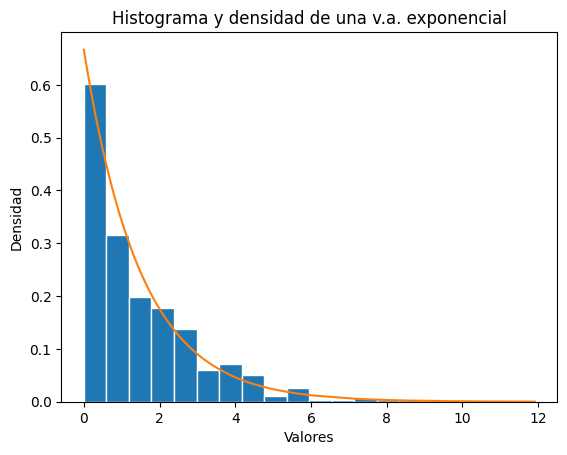

In [ ]:
plt.hist(x, bins=20, edgecolor = "white", density=True)
plt.plot(x, x_fdp)
plt.ylabel('Densidad')
plt.xlabel('Valores')
plt.title('Histograma y densidad de una v.a. exponencial')
plt.show()

**Cambio en parámetros**. Vemos cómo influye en la distribución el cambio en el parámetro $\lambda$ tomando valores 0.5, 1 y 1.5. Generamos 500 observaciones en cada caso y calculamos la densidad.

In [ ]:
np.random.seed(123)
# Generación de variables aleatorias
X = []
parametro_lambda = [0.5, 1, 1.5]
for i in parametro_lambda:
  x = np.random.exponential(scale=i, size=500)
  x = np.sort(x) # ordenamos de menor a mayor
  X.append(x)

# Funciones de densidad
f = []
for i in range(3):
  x_fdp = stats.expon.pdf(X[i], scale=parametro_lambda[i])
  f.append(x_fdp)

Graficamos las funciones de densidad de los tres casos.

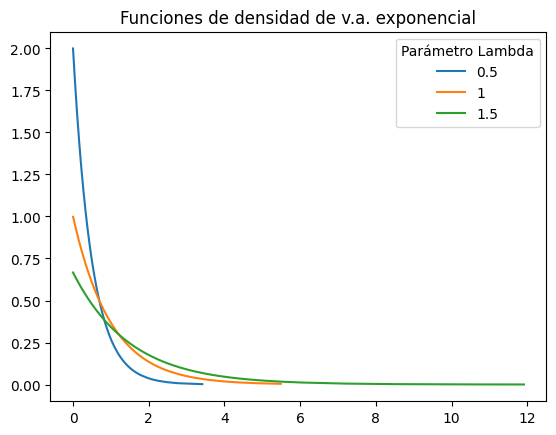

In [ ]:
for i in range(3):
  plt.plot(X[i],f[i], label=parametro_lambda[i])
plt.title('Funciones de densidad de v.a. exponencial')
plt.legend(title='Parámetro Lambda')

# Otras distribuciones continuas

## Distribución Gamma

### Definición

Este tipo de distribución es útil para modelar variables aleatorias que asumen valores positivos y son generalmente asimétricas. Una variable aleatoria continua $X$ tendrá distribución gamma con parámetros $a$ (parámetro de forma)  y $b$ (parámetro de escala) si su función de densidad es la siguiente:

$$f(x/a,b)=\frac{b^a}{\Gamma(a)}x^{a-1}e^{-xb}$$

donde $a>0$, $b>0$ y la función gamma es $\Gamma(a)= \int_{0}^{\infty} x^{a-1}e^{-x}dx$

Momentos de la distribución: $E(X)=ab$ y $V(X)=ab^2$

### Simulación

Para generar variables aleatorias gamma, debemos definir los parámetros de forma y de escala.

Como primera prueba, fijamos el parámetro de escala en 3 y variamos el parámetro de forma para ver cómo la distribución se vuelve más simétrica alrededor de su media a medida que $a$ crece. Definimos un vector de parámetros de forma y por medio de un bucle guardamos los resultados de las variables aleatorias simuladas. Luego, calculamos la función de densidad para cada una de ellas.

In [ ]:
np.random.seed(123)

shape=[2,5,10,15,20] # parámetro a
scale=3              # parámetro b

# Generación de variables aleatorias gamma
X = []
for i in shape:
  x = np.random.gamma(shape=i, scale=scale, size=1000)
  x = np.sort(x) # ordenamos de menor a mayor
  X.append(x)

In [ ]:
# Densidad de las v.a. gamma
f = []
for i in range(5):
  f.append(X[i]**(shape[i]-1)*(np.exp(-X[i]/scale) / (sps.gamma(shape[i])*scale**shape[i])))

stats.gamma.pdf(x)

Vemos gráficamente las funciones de densidad:

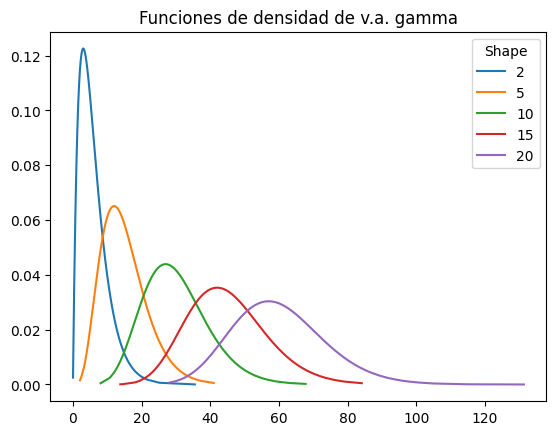

In [ ]:
for i in range(5):
  plt.plot(X[i],f[i], label=shape[i])
plt.title('Funciones de densidad de v.a. gamma')
plt.legend(title='Shape')

Calculamos el momento poblacional de la esperanza y su estimación con la media muestral:

In [ ]:
# Esperanza
E_x = shape[1]*3
# Media muestral
mean_x = X[1].mean()

print("Esperanza: ", E_x)
print("Media muestral: ", mean_x)

Esperanza:  15
Media muestral:  15.026896134557072


Calculamos el momento poblacional de la varianza y su estimación con la varianza muestral:

In [ ]:
# Varianza
V_x = shape[1]*(3**2)
# Varianza muestral
var_x = X[1].var()

print("Varianza: ", V_x)
print("Media muestral: ", var_x)

Varianza:  45
Media muestral:  42.72547817304318
